# Generate pre-labeled kymographs for testing VAE
#### Capstone Group L

Provides an interface for generating sample artificial kymographs and generating datasets of arbitrariy size, characteristics for training and validating VAE models.

In [1]:
#Required Packages
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.ndimage import convolve
from ipywidgets import interact, interact_manual
import json
from json import JSONEncoder
from PIL import Image
import pandas as pd
import os
from torch.utils.data import Dataset
import torch

In [2]:
#common variables
pi = np.pi
work_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
exp_json = os.path.join(work_dir, 'Datateam/imset1/experimental_kymograph.json')
class ExpKymoDataset(Dataset):
    def __init__(self):
        #data loading
        with open(exp_json, 'r') as f:
            kymos = np.asarray(json.loads(f.read()))

        smaller_extreme = np.min([np.abs(kymos.min()), np.abs(kymos.max())])
        kymos = np.clip(kymos, -smaller_extreme, smaller_extreme)
        #kymos = np.transpose(kymos, (2,0,1))

        self.x = torch.from_numpy(kymos.astype('float32'))
        self.n_samples = kymos.shape[0]

    def __getitem__(self, index):
        return torch.unsqueeze(self.x[:,:,index], 0)

    def __len__(self):
        return self.n_samples

    def numpy(self):
        return self.x.numpy()

data = ExpKymoDataset()

#### Dataset Generator Functions

In [3]:
@interact
def KymogenGenerative(style=["sin","polar","random"], height=(10, 40, 10), width=(20, 120, 20), plot=False):
    """Generates a matrix defining artifical kymograph. """
    
    h,w = height, width
    hscale = (h/100)
    wscale = (w/200)

    def sinkymo():
        #Base assignments
        domain = np.linspace(0,6*np.pi,w)
        phase = (np.random.rand(1)*pi)
        freq = (np.random.rand(1))
        heatmap = np.random.normal(2.3,0.6,(h,w))
        #heatmap = np.ones((h,w))

        #callables
        shiftsin = lambda t,phase,freq : 30*hscale*(np.sin(freq*t+phase))+50*hscale #base sin wave

        #mid assigns
        mapRange = np.array(shiftsin(domain,phase, freq))
        normRange = (np.floor(mapRange))

        for i in range(0,w):
            if bool(random.getrandbits(1)):
                for k in range(int(-13*hscale),int(12*hscale)):
                    heatmap[int(normRange[i])+k,i] = 2.7-0.02*(i/(10*wscale))
            else:
                for k in range(int(-9*hscale),int(8*hscale)):
                    heatmap[int(normRange[i])+k,i] = 3.2-0.03*(i/(10*wscale))

        #plot smoothing
        kernel_size = 6
        kernel = 10*(np.ones((kernel_size,kernel_size))/ kernel_size)
        heatmap = convolve(heatmap, kernel)
        heatmap = convolve(heatmap, kernel)
        
        return heatmap

    def polkymo():
        domain = np.linspace(0,6*np.pi,w)
        heatmap = np.random.normal(1,0.5,(h,w))
        
        for i in range(0,w):
            if bool(random.getrandbits(1)):
                for k in range(0,int(7*hscale)):
                    heatmap[h-(k+1),i] = 1+random.uniform(1, 2)-0.02*(i/(10*wscale))
            else:
                for k in range(0,int(5*hscale)):
                    heatmap[h-(k+1),i] = 1+random.uniform(0.5, 3)-0.03*(i/(10*wscale))
                    
        #plot smoothing
        kernel_size = 6
        kernel = 10*(np.ones((kernel_size,kernel_size))/ kernel_size)
        heatmap = convolve(heatmap, kernel)
        heatmap = convolve(heatmap, kernel)
      
        return heatmap
            
    def randkymo():
        heatmap = np.random.normal(0.5,0.1,(h,w))
        for i in range(0,w):
            for k in range(0,int(10*hscale)):
                    heatmap[h-(k+1),i] = heatmap[h-(k+1),i] - 0.1
            for k in range(0,int(10*hscale)):
                    heatmap[-(h-(k+1)),i] = heatmap[-(h-(k+1)),i] - 0.1
        kernel_size = 6
        kernel = 40*(np.ones((kernel_size,kernel_size))/ kernel_size)
        heatmap = convolve(heatmap, kernel)
        heatmap = convolve(heatmap, kernel)
        return heatmap
        
            
    if style == "sin":
        if plot:
            plt.imshow((2*sinkymo()+randkymo())/1000, cmap='plasma')
        else:
            return sinkymo()
    elif style == "polar":
        if plot:
            plt.imshow(polkymo(), cmap='plasma')
        else:
            return polkymo()
    elif style == "random":
        if plot:
            plt.imshow(randkymo(), cmap='plasma')
        else:
            return randkymo()
    else:
        raise ValueError("'style' must be set to string 'sin', 'polar', or 'random'.")

interactive(children=(Dropdown(description='style', options=('sin', 'polar', 'random'), value='sin'), IntSlide…

In [4]:
@interact
def KymogenGenerative(style=["sin","polar","random"], height=(10, 40, 10), width=(20, 120, 20), plot=False):
    """Generates a matrix defining artifical kymograph. """
    
    h,w = height, width
    hscale = (h/100)
    wscale = (w/200)

    def sinkymo():
        #Base assignments
        domain = np.linspace(0,6*np.pi,w)
        phase = (np.random.rand(1)*pi)
        freq = (np.random.rand(1))
        heatmap = np.random.normal(2.3,0.6,(h,w))
        #heatmap = np.ones((h,w))

        #callables
        shiftsin = lambda t,phase,freq : 30*hscale*(np.sin(freq*t+phase))+50*hscale #base sin wave

        #mid assigns
        mapRange = np.array(shiftsin(domain,phase, freq))
        normRange = (np.floor(mapRange))

        for i in range(0,w):
            if bool(random.getrandbits(1)):
                for k in range(int(-13*hscale),int(12*hscale)):
                    heatmap[int(normRange[i])+k,i] = 2.7-0.02*(i/(10*wscale))
            else:
                for k in range(int(-9*hscale),int(8*hscale)):
                    heatmap[int(normRange[i])+k,i] = 3.2-0.03*(i/(10*wscale))

        #plot smoothing
        kernel_size = 6
        kernel = 10*(np.ones((kernel_size,kernel_size))/ kernel_size)
        heatmap = convolve(heatmap, kernel)
        heatmap = convolve(heatmap, kernel)
        
        return heatmap

    def polkymo():
        domain = np.linspace(0,6*np.pi,w)
        heatmap = np.random.normal(1,0.5,(h,w))
        
        for i in range(0,w):
            if bool(random.getrandbits(1)):
                for k in range(0,int(7*hscale)):
                    heatmap[h-(k+1),i] = 1+random.uniform(1, 2)-0.02*(i/(10*wscale))
            else:
                for k in range(0,int(5*hscale)):
                    heatmap[h-(k+1),i] = 1+random.uniform(0.5, 3)-0.03*(i/(10*wscale))
                    
        #plot smoothing
        kernel_size = 6
        kernel = 10*(np.ones((kernel_size,kernel_size))/ kernel_size)
        heatmap = convolve(heatmap, kernel)
        heatmap = convolve(heatmap, kernel)
      
        return heatmap
            
    def randkymo():
        heatmap = np.random.normal(0.5,0.1,(h,w))
        for i in range(0,w):
            for k in range(0,int(10*hscale)):
                    heatmap[h-(k+1),i] = heatmap[h-(k+1),i] - 0.1
            for k in range(0,int(10*hscale)):
                    heatmap[-(h-(k+1)),i] = heatmap[-(h-(k+1)),i] - 0.1
        kernel_size = 6
        kernel = 40*(np.ones((kernel_size,kernel_size))/ kernel_size)
        heatmap = convolve(heatmap, kernel)
        heatmap = convolve(heatmap, kernel)
        return heatmap
        
            
    if style == "sin":
        if plot:
            plt.imshow((2*sinkymo()+randkymo())/1000, cmap='plasma')
        else:
            return sinkymo()
    elif style == "polar":
        if plot:
            plt.imshow(polkymo(), cmap='plasma')
        else:
            return polkymo()
    elif style == "random":
        if plot:
            plt.imshow(randkymo(), cmap='plasma')
        else:
            return randkymo()
    else:
        raise ValueError("'style' must be set to string 'sin', 'polar', or 'random'.")

interactive(children=(Dropdown(description='style', options=('sin', 'polar', 'random'), value='sin'), IntSlide…

In [5]:
@interact
def exp(i = (0,100,1)):
    plt.imshow(data[i].squeeze().detach().numpy(), cmap='plasma')

interactive(children=(IntSlider(value=50, description='i'), Output()), _dom_classes=('widget-interact',))

In [6]:
def sampleGenerator(n, h, w, forms = ['sin','polar','random'], labeled = False):

    """Generates artificial dataset with n size hxw kymographs of each form specified"""

    sampleSize = [n*len(forms),h,w]
    sample = np.zeros(sampleSize)
    j = 0

    for i in range(len(forms)*n): #0:2
        sample[i,:,:] = KymogenGenerative(style = forms[j], height=h, width=w)
        if (i > 1 and int(i%100) == 0):
            j = j+1
            
    return sample

In [7]:
#Custom JSON encoder for numpy tensors
class NumpyTensor(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [8]:
#JSON encoding process
kymoset = sampleGenerator(100,20,60,forms=['sin','polar','random'])
kymoset_data = {"kymoset": kymoset}
kymoset_JSON = json.dumps(kymoset_data, cls=NumpyTensor)

In [9]:
def art(shape):
    KymogenGenerative(style = shape, height=20, width=60, plot=True)

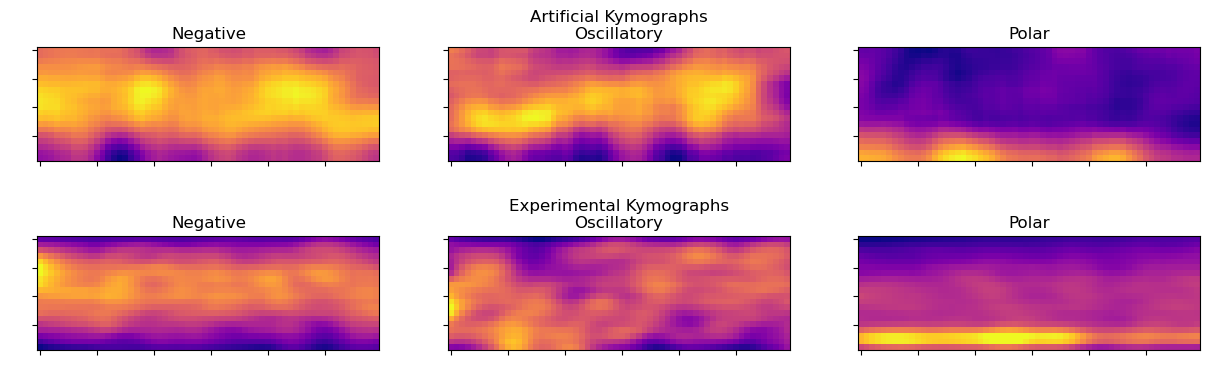

In [10]:
#Example decoding process (probably not necessary with pytorch dataloader) and demo of storage indicies
decoded_kymo = np.asarray(json.loads(kymoset_JSON)["kymoset"])
plt.figure(figsize=(15,4.5))
plt.subplot(2,3,1)
plt.title('\nNegative')
art('random')
plt.xticks(c='w')
plt.yticks(c='w')
plt.subplot(2,3,2)
plt.title('Artificial Kymographs\nOscillatory')
art('sin')
plt.xticks(c='w')
plt.yticks(c='w')
plt.subplot(2,3,3)
plt.title('\nPolar')
art('polar')
plt.xticks(c='w')
plt.yticks(c='w')
plt.subplot(2,3,4)
plt.title('\nNegative')
plt.xticks(c='w')
plt.yticks(c='w')
exp(9)
plt.subplot(2,3,5)
plt.title('Experimental Kymographs\nOscillatory')
plt.xticks(c='w')
plt.yticks(c='w')
exp(20)
plt.subplot(2,3,6)
plt.title('\nPolar')
plt.xticks(c='w')
plt.yticks(c='w')
exp(51)

In [11]:
#Example dump to a file in local system
datafolder = "C:/Users/Aidan/Documents/Winter_2023/BE177B/Code/wonglab-capstone/Datateam/Artificial_imset"
with open(datafolder+'/artificial_kymographs.json', 'w') as f:
  json.dump(kymoset_data, f, ensure_ascii=False, cls=NumpyTensor)